In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'description.txt',
 'ml01.ipynb',
 'test_data.txt',
 'test_data_solution.txt',
 'train_data.txt']

In [6]:
# Display data 

import pandas as pd
data = pd.read_csv("description.txt")
data

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


# TRAINING DATA

In [5]:
# for training data

import pandas as pd

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = f.readlines()

    # Split by ':::'
    data = [line.strip().split(':::') for line in data if len(line.strip().split(':::')) == 4]

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['id', 'title', 'genre', 'description'])
    return df


In [6]:
# To observe the dataset in dataframes

train_df = load_data('train_data.txt')
print(train_df.head())  # See the first 5 rows



   id                               title       genre  \
0  1        Oscar et la dame rose (2009)       drama    
1  2                        Cupid (1997)    thriller    
2  3    Young, Wild and Wonderful (1980)       adult    
3  4               The Secret Sin (1915)       drama    
4  5              The Unrecovered (2007)       drama    

                                         description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


# TESTING DATA

In [7]:
# for testing data 

def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = f.readlines()

    # Split by ':::'
    data = [line.strip().split(':::') for line in data if len(line.strip().split(':::')) == 3]

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['id', 'title', 'description'])
    return df


In [8]:
test_df = load_data('test_data.txt')
print(test_df.head())

   id                          title  \
0  1           Edgar's Lunch (1998)    
1  2       La guerra de papá (1977)    
2  3    Off the Beaten Track (2010)    
3  4         Meu Amigo Hindu (2015)    
4  5              Er nu zhai (1955)    

                                         description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


# TESTING DATA SOLUTION

In [9]:
# For test_data_solution

import pandas as pd

def load_solution_data(filepath):
    """
    Loads test_data_solution.txt with full info (id, title, genre, description).
    Returns a DataFrame with columns: id, title, genre, description.
    """
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(":::")
            if len(parts) == 4:
                movie_id = parts[0].strip()
                title = parts[1].strip()
                genre = parts[2].strip()
                description = parts[3].strip()
                data.append((movie_id, title, genre, description))
    df = pd.DataFrame(data, columns=["id", "title", "genre", "description"])
    return df



In [10]:
df_solution = load_solution_data("test_data_solution.txt")
print(df_solution.head())


  id                        title        genre  \
0  1         Edgar's Lunch (1998)     thriller   
1  2     La guerra de papá (1977)       comedy   
2  3  Off the Beaten Track (2010)  documentary   
3  4       Meu Amigo Hindu (2015)        drama   
4  5            Er nu zhai (1955)        drama   

                                         description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...  


# TRAING DATA

In [11]:

print("Train Data:")
train_df

Train Data:


,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


# FEATURE EXTRACTION

In [12]:


# Import the correct class (Typo fixed: TfidfVectorizer, not TfidVectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer  

# Create a TF-IDF vectorizer object
# max_features = 10000 means it will only keep the 10,000 most frequent words
vectorizer = TfidfVectorizer(max_features=10000)

# Fit the vectorizer on training data and transform it to a matrix
# This turns each description into a vector of numbers
x_train_tfidf = vectorizer.fit_transform(train_df["description"])

# Use the same vectorizer to transform the test data
# IMPORTANT: We don't fit again, only transform — to keep same word meanings
x_test_tfidf = vectorizer.transform(test_df["description"])

# Print the shapes to see how many samples and features (words) we have
print(f"Training data shape: {x_train_tfidf.shape}") 
print(f"Test data shape: {x_test_tfidf.shape}")        


Training data shape: (54214, 10000)
Test data shape: (54200, 10000)


# ENCODING THE TARGET COLUMNS

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['genre'])

print(f"Unique genres in the training data: {label_encoder.classes_}")


Unique genres in the training data: [' action ' ' adult ' ' adventure ' ' animation ' ' biography ' ' comedy '
 ' crime ' ' documentary ' ' drama ' ' family ' ' fantasy ' ' game-show '
 ' history ' ' horror ' ' music ' ' musical ' ' mystery ' ' news '
 ' reality-tv ' ' romance ' ' sci-fi ' ' short ' ' sport ' ' talk-show '
 ' thriller ' ' war ' ' western ']


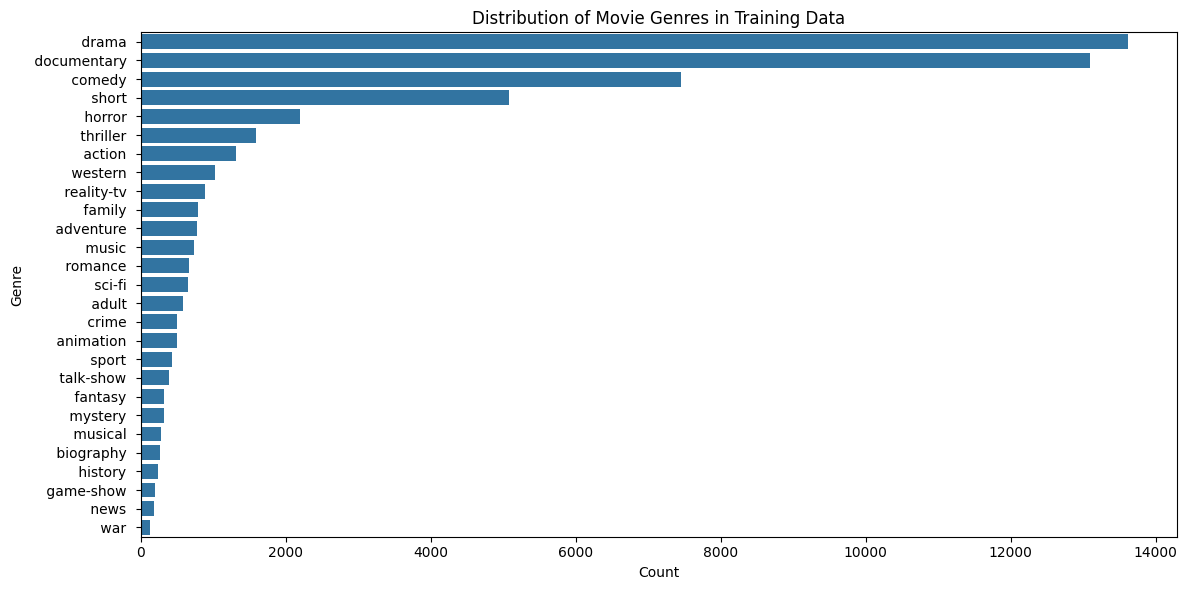

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(y='genre', data=train_df, order=train_df['genre'].value_counts().index)
plt.title("Distribution of Movie Genres in Training Data")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


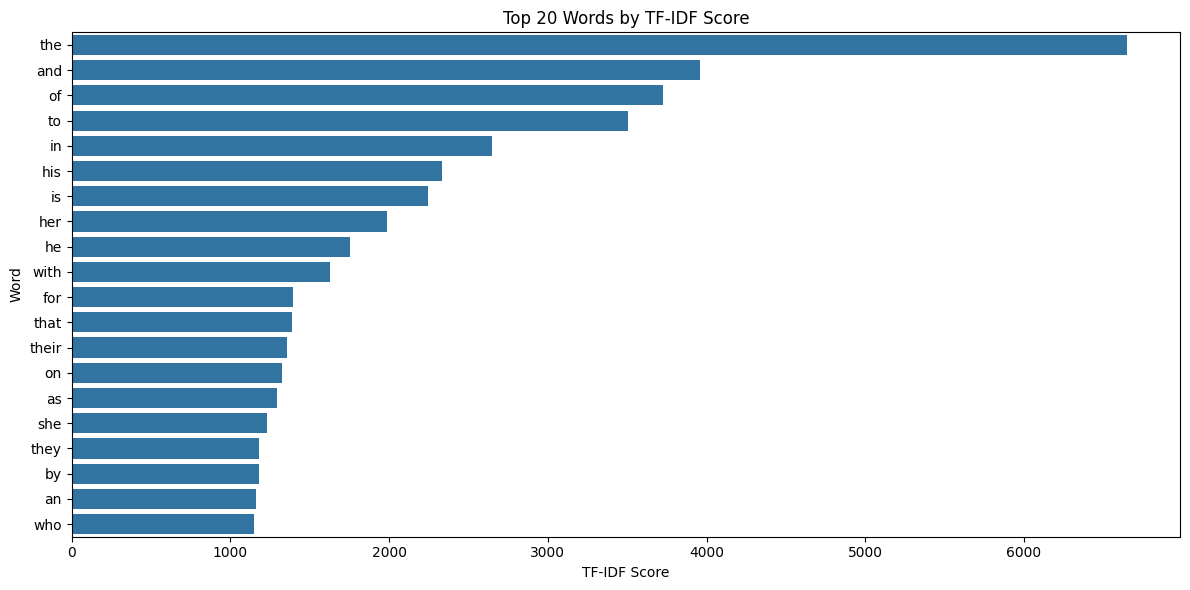

In [17]:
import numpy as np

# Sum TF-IDF scores for each word
feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_scores = x_train_tfidf.sum(axis=0).A1
top_n_idx = np.argsort(tfidf_scores)[::-1][:20]

plt.figure(figsize=(12,6))
sns.barplot(x=tfidf_scores[top_n_idx], y=feature_array[top_n_idx])
plt.title("Top 20 Words by TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


# BUILDING MODEL (Linear regression)

In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(x_train_tfidf, y_train)

# Predict on test data
y_pred = lr_model.predict(x_test_tfidf)

# Convert numeric predictions back to genre names
predicted_genres = label_encoder.inverse_transform(y_pred)

# Add predictions to the test DataFrame
test_df['Predicted_Genres'] = predicted_genres

# Display title and predicted genre
test_df[['title', 'Predicted_Genres']]


,title,Predicted_Genres
0,Edgar's Lunch (1998),drama
1,La guerra de papá (1977),drama
2,Off the Beaten Track (2010),documentary
3,Meu Amigo Hindu (2015),drama
4,Er nu zhai (1955),drama
...,...,...
54195,"""Tales of Light & Dark"" (2013)",drama
54196,Der letzte Mohikaner (1965),drama
54197,Oliver Twink (2007),comedy
54198,Slipstream (1973),drama


In [20]:
test_df['id'] = test_df['id'].str.strip()
df_solution['id'] = df_solution['id'].str.strip()




In [28]:
# 1. Clean ID columns BEFORE merging
test_df['id'] = test_df['id'].astype(str).str.strip()
df_solution['id'] = df_solution['id'].astype(str).str.strip()

# 2. Merge prediction results with solution
merged_df = pd.merge(
    df_solution[['id', 'genre']],
    test_df[['id', 'Predicted_Genre']],
    on='id'
)

# 3. Clean genre labels
merged_df['genre'] = merged_df['genre'].str.strip().str.lower()
merged_df['Predicted_Genre'] = merged_df['Predicted_Genre'].str.strip().str.lower()

# 4. Now check accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(merged_df['genre'], merged_df['Predicted_Genre'])
print(f" Accuracy (Logistic Regression): {accuracy:.4f}")


 Accuracy (Logistic Regression): 0.5947


# Evaluation of the model

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
y_true = merged_df['genre']
y_pred = merged_df['Predicted_Genre']


In [31]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5947


In [32]:
print("Classification Report:")
print(classification_report(y_true, y_pred))


Classification Report:


C:\Users\yashn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yashn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.51      0.29      0.37      1314
       adult       0.64      0.25      0.36       590
   adventure       0.67      0.16      0.26       775
   animation       0.56      0.04      0.08       498
   biography       0.00      0.00      0.00       264
      comedy       0.54      0.60      0.57      7446
       crime       0.41      0.03      0.06       505
 documentary       0.68      0.87      0.76     13096
       drama       0.55      0.79      0.65     13612
      family       0.48      0.08      0.14       783
     fantasy       0.61      0.03      0.06       322
   game-show       0.90      0.49      0.64       193
     history       0.00      0.00      0.00       243
      horror       0.66      0.57      0.61      2204
       music       0.68      0.46      0.55       731
     musical       0.44      0.01      0.03       276
     mystery       0.25      0.00      0.01       318
        news       0.64    

C:\Users\yashn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# NAVIE BAYES' MODEL

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train_tfidf,y_train)



MultinomialNB()

In [34]:
y_pred_nb = nb_model.predict(x_test_tfidf)
predicted_genres_nb = label_encoder.inverse_transform(y_pred_nb)
test_df['Predicted_Genre_NB'] = predicted_genres_nb
merged_df_nb = pd.merge(df_solution,test_df[['id','Predicted_Genre_NB']],on='id')
merged_df_nb['genre'] = merged_df_nb['genre'].str.strip().str.lower()
merged_df_nb['Predicted_Genre_NB'] = merged_df_nb['Predicted_Genre_NB'].str.strip().str.lower()


In [35]:
# evaluation for naive model

from sklearn.metrics import accuracy_score,classification_report

accuracy_NB = accuracy_score(merged_df_nb['genre'],merged_df_nb['Predicted_Genre_NB'])
print(f"Naive Bayes ACCURACY: {accuracy_NB}")

Naive Bayes ACCURACY: 0.5092066420664206


# CONFUSION MATRIX

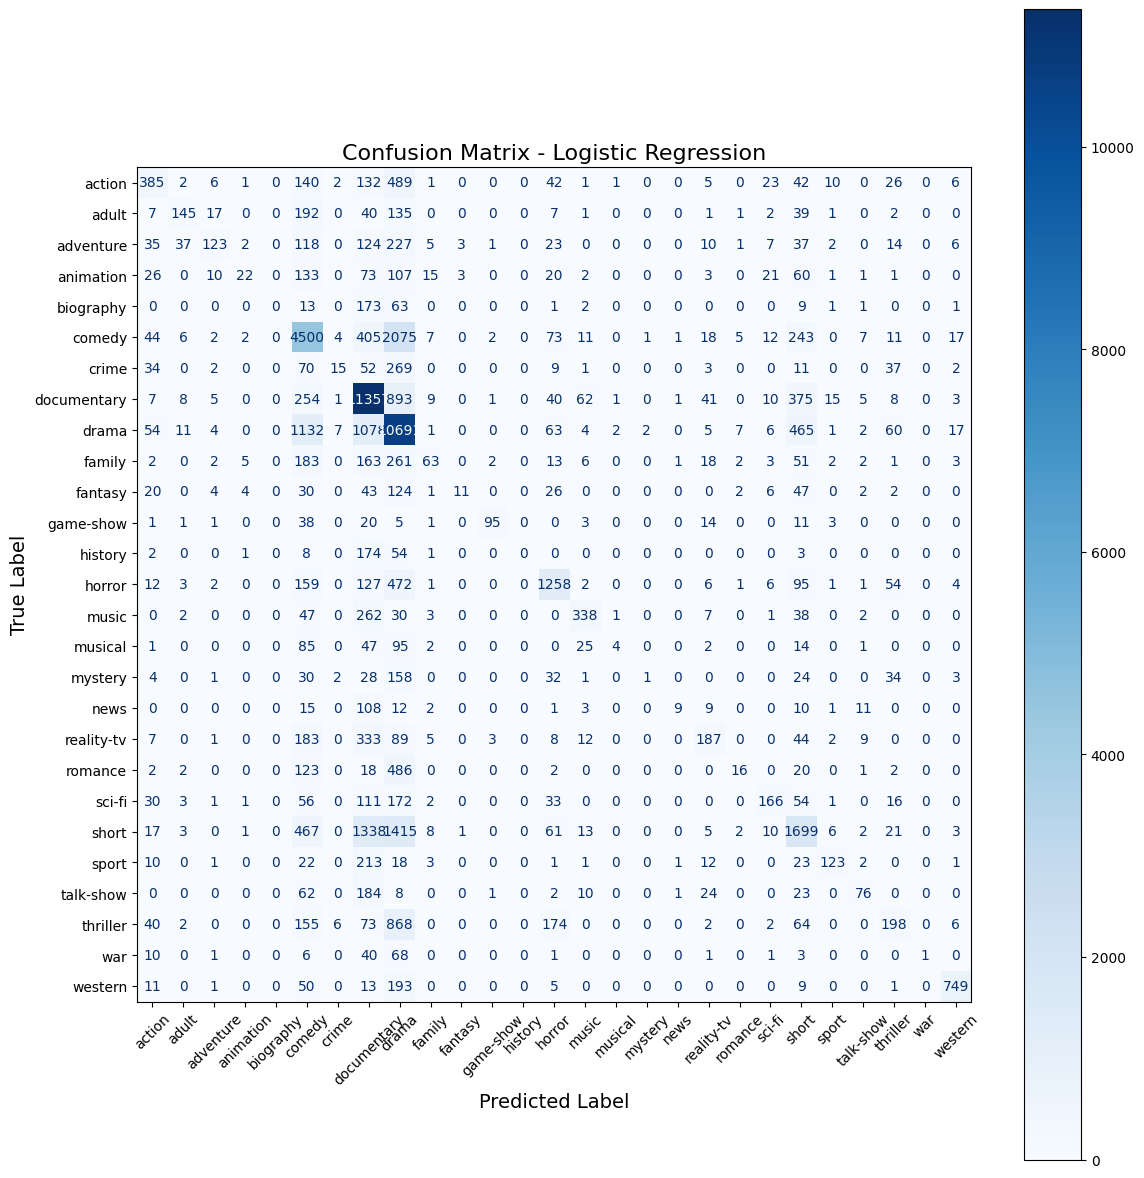

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Get unique labels (sorted for cleaner display)
actual_labels = sorted(merged_df['genre'].unique())

# Step 2: Create the confusion matrix
cm_lr = confusion_matrix(
    merged_df['genre'],
    merged_df['Predicted_Genre'],
    labels=actual_labels
)

# Step 3: Set a larger figure and increase font sizes for clarity
fig, ax = plt.subplots(figsize=(12, 12))  # Larger size
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=actual_labels)
disp_lr.plot(
    include_values=True,
    cmap='Blues',
    ax=ax,
    xticks_rotation=45,  # Angle x-labels to avoid overlap
    values_format='d'    # Show integers
)

# Step 4: Style the plot
plt.title("Confusion Matrix - Logistic Regression", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()


# Updated KDE Plot for year Feature (Train vs Test)

In [43]:
import re

# Extract years from titles if available
train_df['year'] = train_df['title'].str.extract(r'\((\d{4})\)').astype(float)
test_df['year'] = test_df['title'].str.extract(r'\((\d{4})\)').astype(float)

# Drop NaNs if year couldn't be extracted
train_df = train_df.dropna(subset=['year'])
test_df = test_df.dropna(subset=['year'])


C:\Users\yashn\AppData\Local\Temp\ipykernel_11032\296646664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['year'] = train_df['title'].str.extract(r'\((\d{4})\)').astype(float)


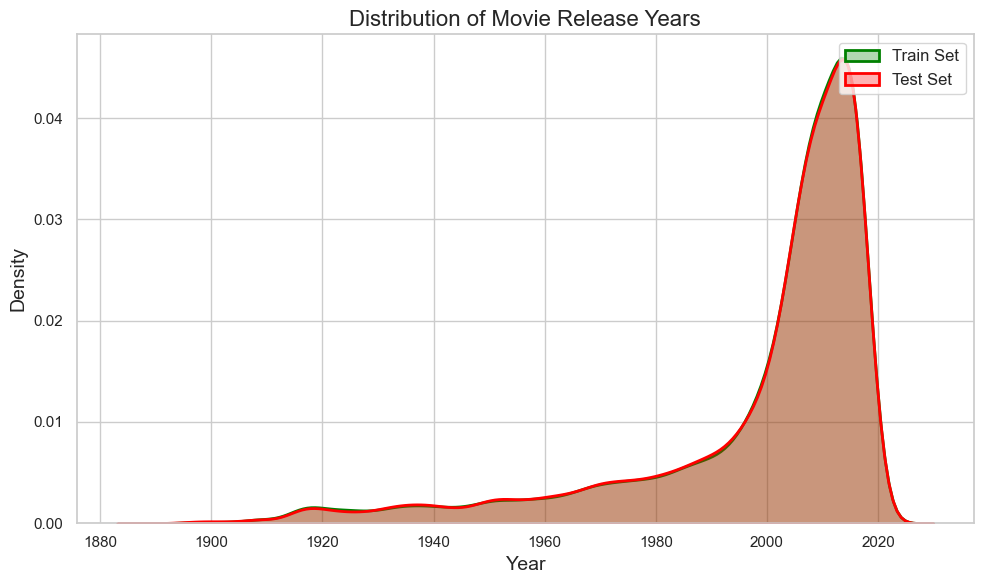

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['year'], color='green', label='Train Set', linewidth=2, fill=True, alpha=0.3)
sns.kdeplot(test_df['year'], color='red', label='Test Set', linewidth=2, fill=True, alpha=0.3)

plt.title('Distribution of Movie Release Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# PREDICTION OF MODEL

In [38]:
zoner_description = [
    'Explosive fight scene in the city streets',
    'A haunted mansion that traps its visitors',
    'A brave adventurer in search of lost treasure',
    'A forbidden romance in the 1920s',
    'A daring rescue mission with a love interest'
]

# Transform the test descriptions using the trained TF-IDF vectorizer
test_data_tfidf = vectorizer.transform(zoner_description)

# Predict using Logistic Regression
y_pred_lr = lr_model.predict(test_data_tfidf)
predicted_genres_lr = label_encoder.inverse_transform(y_pred_lr)

# Predict using Naive Bayes
y_pred_nb = nb_model.predict(test_data_tfidf)
predicted_genres_nb = label_encoder.inverse_transform(y_pred_nb)

# Print results
print("Predicted Genres using Logistic Regression: ", predicted_genres_lr)
print("Predicted Genres using Naive Bayes       : ", predicted_genres_nb)
print()

for i, description in enumerate(zoner_description):
    print(f"Description: {description}")
    print(f"Naive Bayes Prediction       : {predicted_genres_nb[i]}")
    print(f"Logistic Regression Prediction: {predicted_genres_lr[i]}")
    print("=" * 100)


Predicted Genres using Logistic Regression:  [' documentary ' ' horror ' ' adventure ' ' drama ' ' comedy ']
Predicted Genres using Naive Bayes       :  [' documentary ' ' horror ' ' documentary ' ' drama ' ' drama ']

Description: Explosive fight scene in the city streets
Naive Bayes Prediction       :  documentary 
Logistic Regression Prediction:  documentary 
Description: A haunted mansion that traps its visitors
Naive Bayes Prediction       :  horror 
Logistic Regression Prediction:  horror 
Description: A brave adventurer in search of lost treasure
Naive Bayes Prediction       :  documentary 
Logistic Regression Prediction:  adventure 
Description: A forbidden romance in the 1920s
Naive Bayes Prediction       :  drama 
Logistic Regression Prediction:  drama 
Description: A daring rescue mission with a love interest
Naive Bayes Prediction       :  drama 
Logistic Regression Prediction:  comedy 
